In [88]:
import json
import os.path

from IPython.display import Image, display
import pandas as pd

from utils.statistics import cov

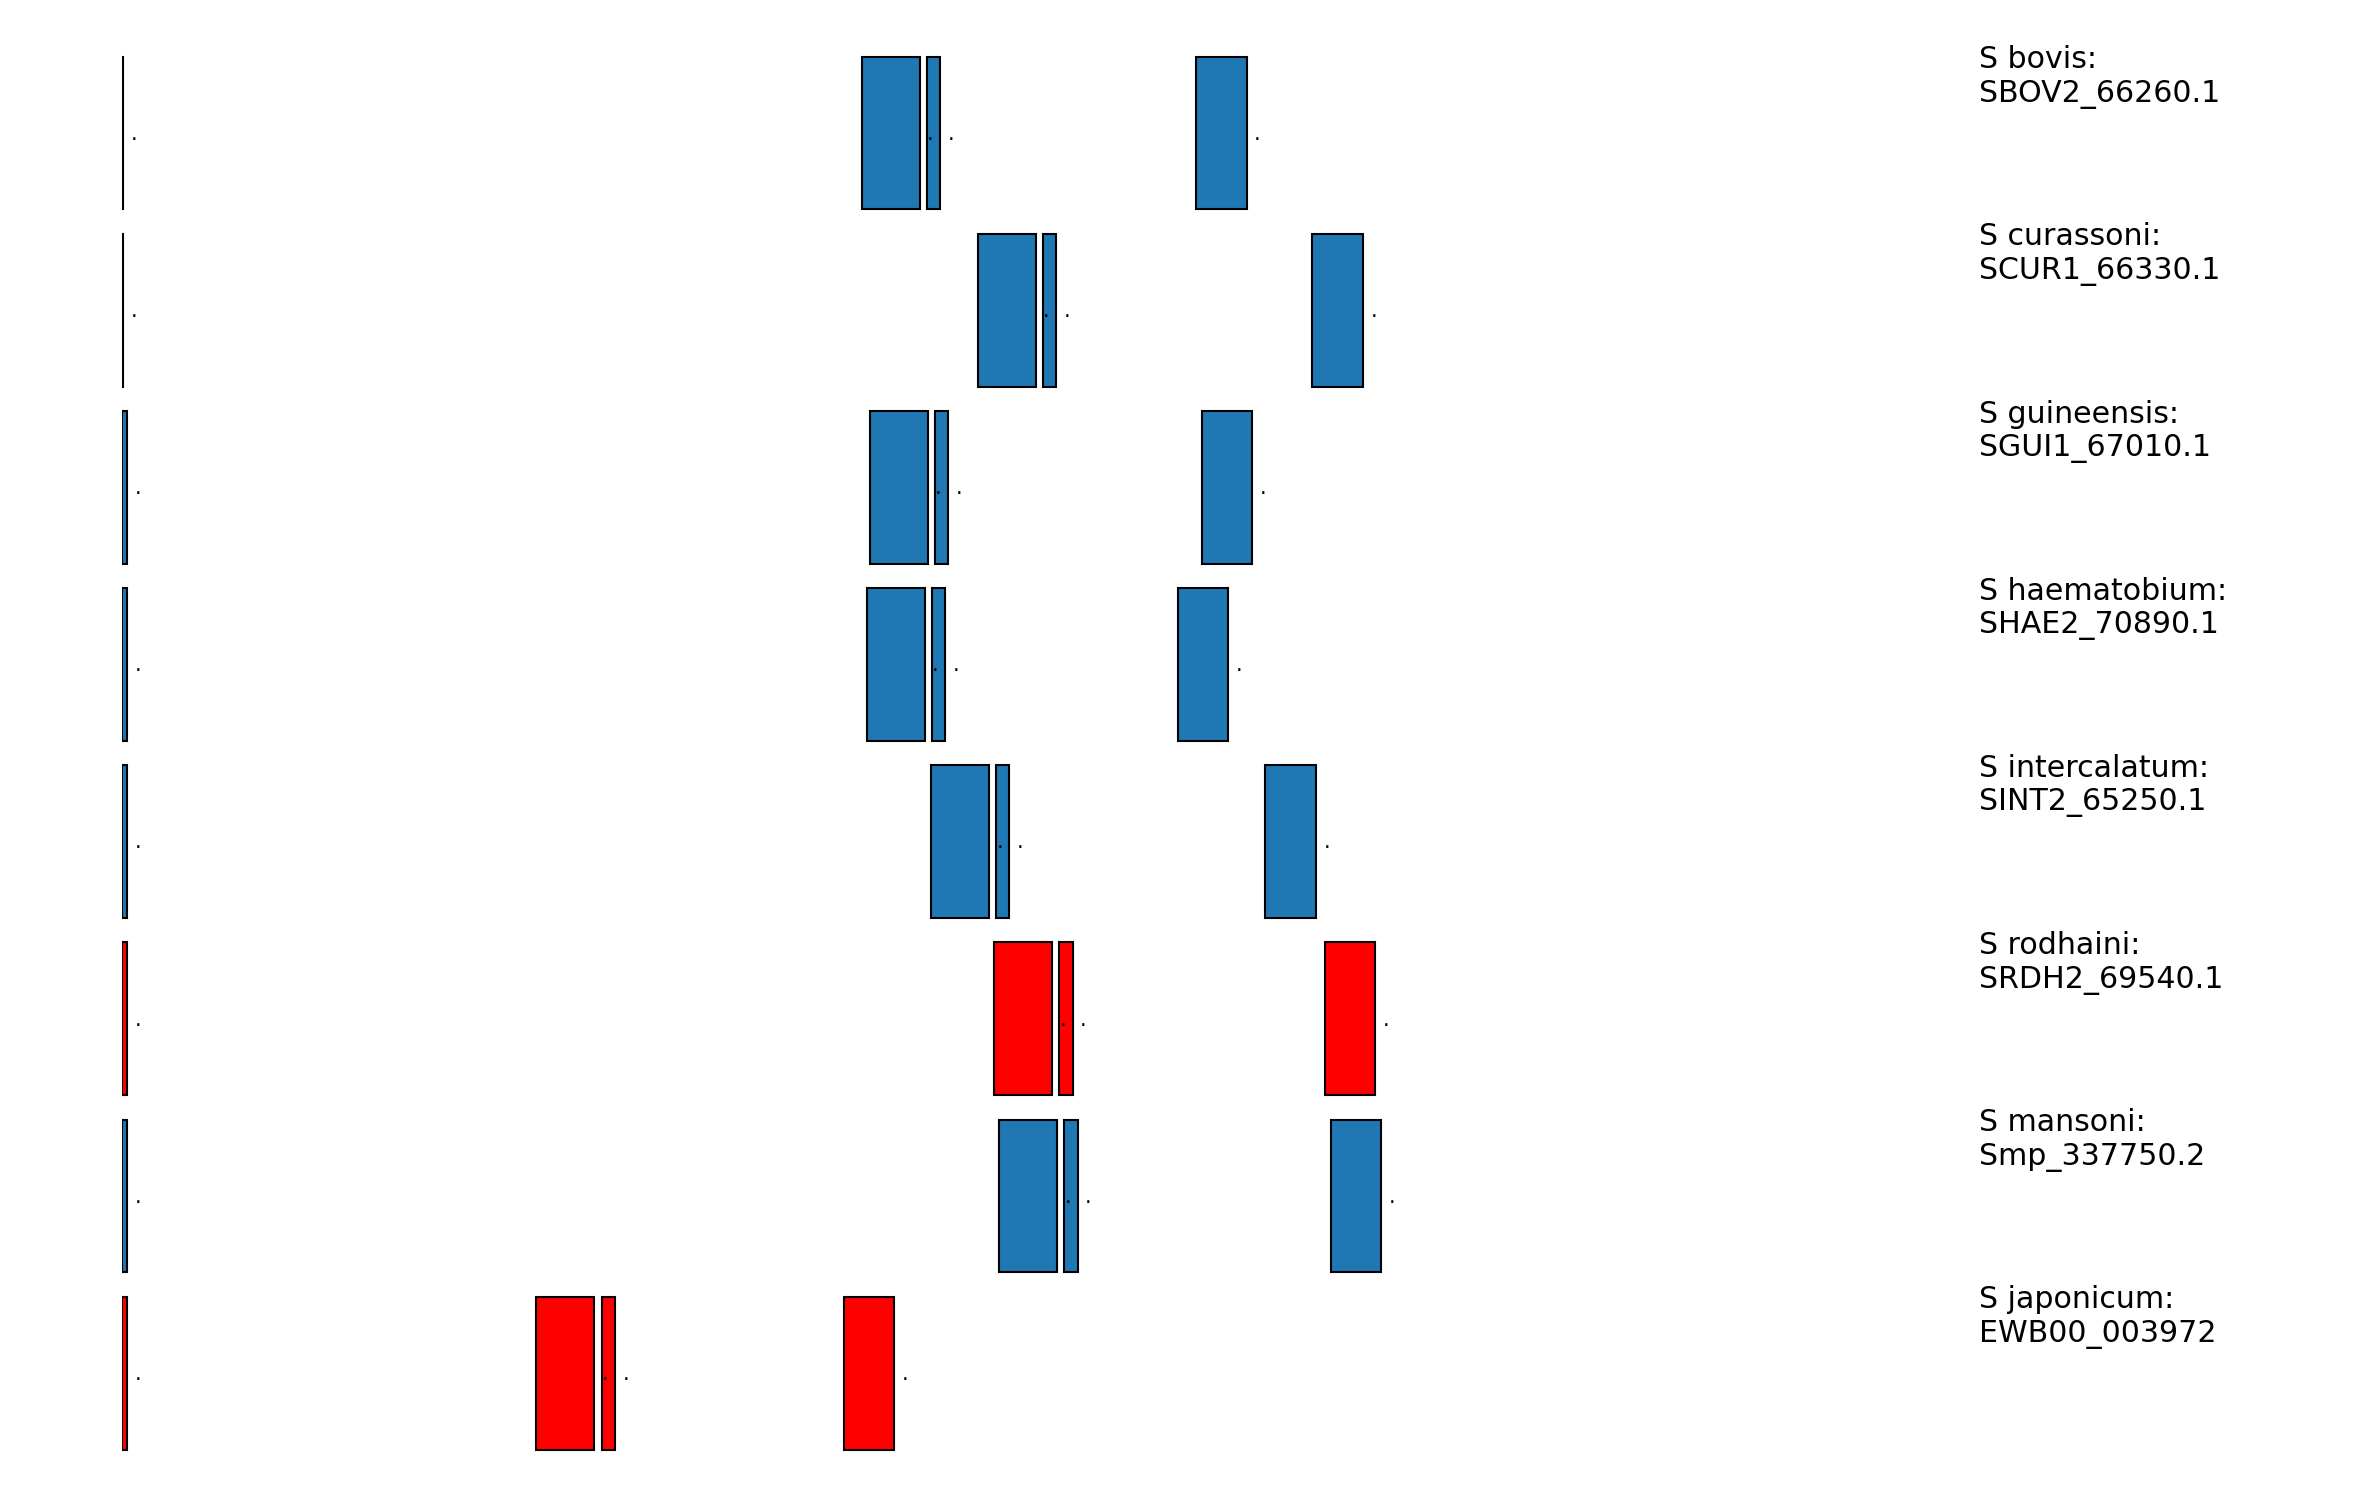

In [10]:
Image("plots/N0.HOG0008263.png", width=900)

![title](plots/N0.HOG0008263.png)

In [15]:
def sort_items_by_cov(path):
    with open(path, "r") as f:
        data = json.load(f)
    return sorted(data.items(), key=lambda item: cov(item[1]))

In [16]:
hog_by_closest_prot_lengths = sort_items_by_cov("prot_lengths.json")
hog_by_closest_exon_counts = sort_items_by_cov("exon_counts.json")

Pick out examples of HOGs that have the greatest variation of prot lengths / exon counts

0
('N0.HOG0005898', [1, 3, 1, 1, 1, 1, 1, 10])


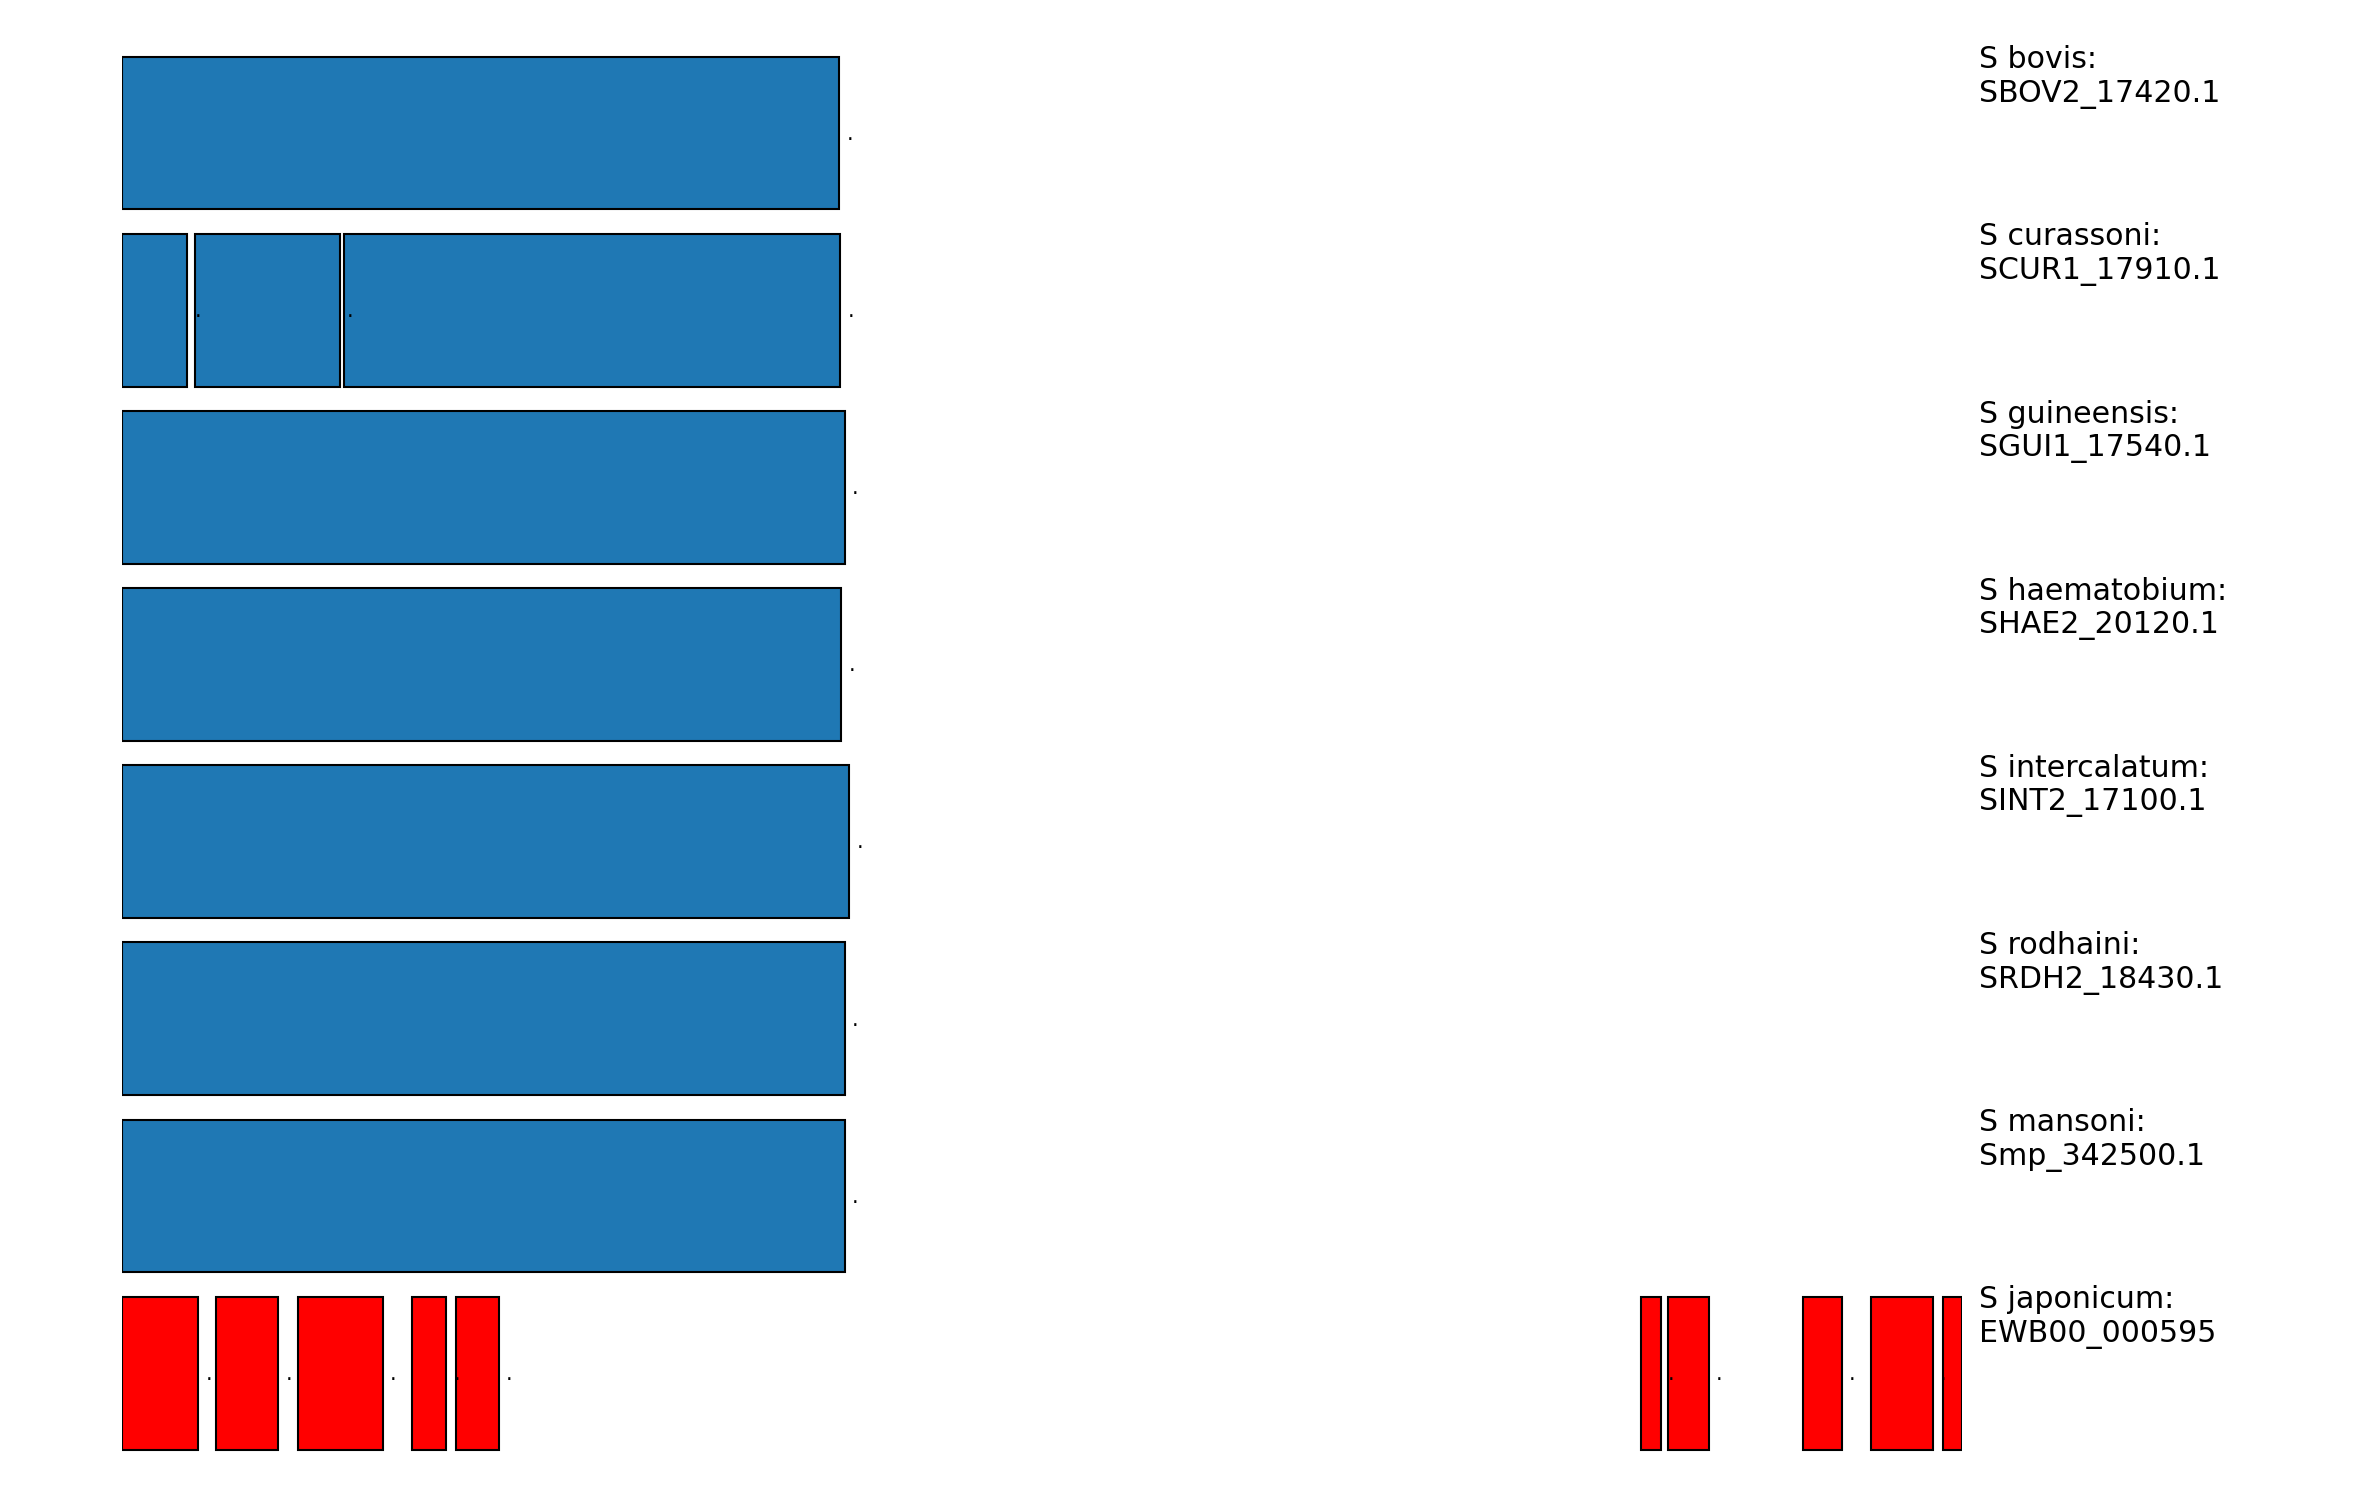

In [117]:
start_idx = 0
for idx, hog in enumerate(list(reversed(hog_by_closest_exon_counts))[start_idx:]):
    plot_path = "plots/" + hog[0] + ".png"
    if os.path.exists(plot_path):
        print(idx + start_idx)
        print(hog)
        display(Image(plot_path, width=900))
        break

In [45]:
prot_length_covs = {}
for (hog, prot_lengths) in hog_by_closest_prot_lengths:
    prot_length_covs[hog] = cov(prot_lengths)

exon_count_covs = {}
for (hog, exon_counts) in hog_by_closest_exon_counts:
    exon_count_covs[hog] = cov(exon_counts)

In [81]:
hog_covs = {}
for (hog, _) in hog_by_closest_exon_counts:
    hog_covs[hog] = [prot_length_covs[hog], exon_count_covs[hog]]

# Sorted by highest overall COVs
sort = sorted(hog_covs.items(), key=lambda item: sum(item[1]))

# Sorted by protein length COV vs exon count COV
sort = sorted(hog_covs.items(), key=lambda x: (x[1][0]-x[1][1]))

Pick out examples of HOGs based on their combined COV scores

0
('N0.HOG0005007', [1.7788391757893334, 0.038745577051317676])


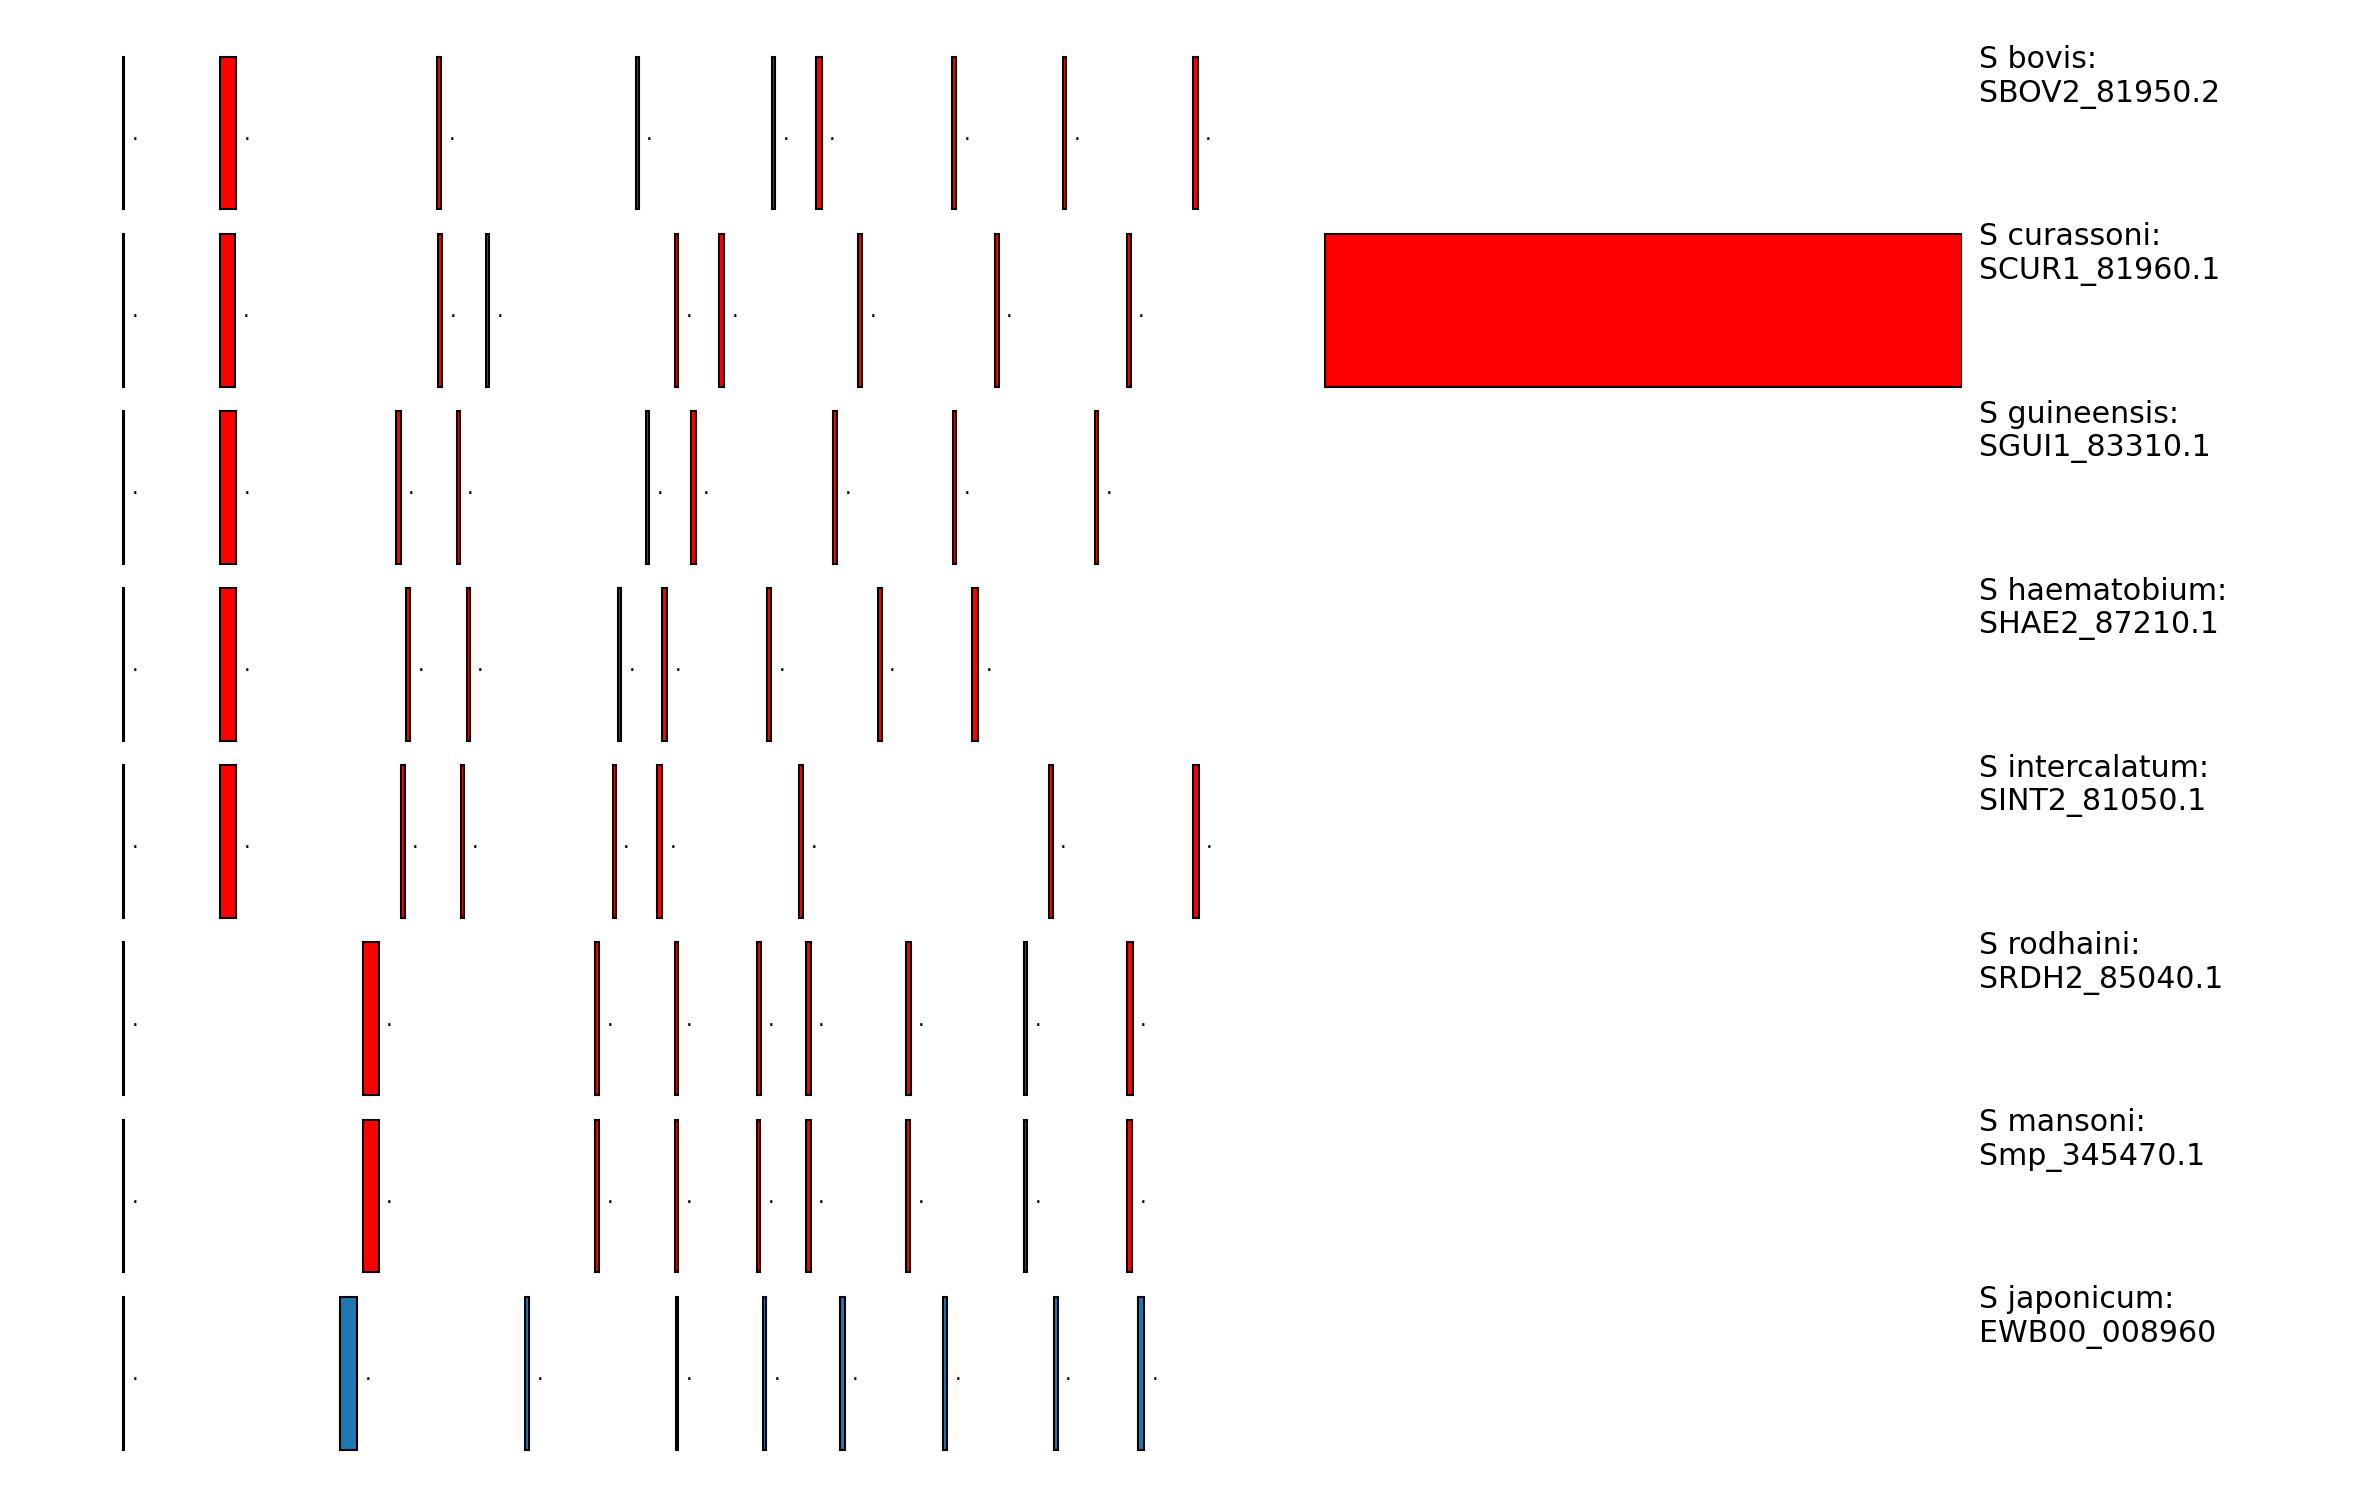

In [137]:
start_idx = 0
for idx, hog in enumerate(list(reversed(sort))[start_idx:]):
    plot_path = "plots/" + hog[0] + ".png"
    if os.path.exists(plot_path):
        print(idx + start_idx)
        print(hog)
        display(Image(plot_path, width=900))
        break

In [114]:
df = pd.DataFrame.from_records(hog_covs, index=["prot_length_covs", "exon_count_covs"]).T
df[df["exon_count_covs"] == 0].sort_values("prot_length_covs", ascending=False).head()

,prot_length_covs,exon_count_covs
N0.HOG0007956,0.838784,0.0
N0.HOG0007459,0.392315,0.0
N0.HOG0005441,0.331996,0.0
N0.HOG0003141,0.305012,0.0
N0.HOG0001509,0.304165,0.0


In [112]:
df[df["prot_length_covs"] <= 0.01].sort_values("exon_count_covs", ascending=False).head()

,prot_length_covs,exon_count_covs
N0.HOG0000603,0.004561,0.942809
N0.HOG0005826,0.007655,0.617213
N0.HOG0005448,0.000000,0.565685
N0.HOG0005465,0.004441,0.376399
N0.HOG0003969,0.008647,0.370328
